# SARS-CoV-2 conformational exploration

This notebook is dedicated to the exploration D.E. Shaw SARS-CoV-2 trajectories. 
https://www.deshawresearch.com/resources_sarscov2.html

Two 10-microsecond simulations with frames every 1.2 nanoseconds.

- Trajectory 1: xxx136. Initiated in the closed state. Remained stable. 
- Trajectory 2: xxx850. Initiated in a partially opened state. Detached. 


In [2]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from MDAnalysis.lib.formats.libdcd import DCDFile

colors = ["cranberry", "tealish", "golden rod"]

sns.set(style='whitegrid', context='talk',
        font_scale=1.2, rc={"lines.linewidth": 3})
sns.set_palette(sns.xkcd_palette(colors))

## Importing trajectory

### Trajectory 

In [3]:
pathtraj = "/home/amelie/Documents/LightOnProjects/lightongit/DiffusionMapsToy/datasets/"
nametraj1 = "sarscov2-10897136-no-water-no-ion-glueCA"
nametraj2 = "sarscov2-10897850-no-water-no-ion-glueCA"
pathtraj1 = pathtraj + "DESRES-Trajectory_" + nametraj1 + "/" + nametraj1 + "/" + nametraj1
pathtraj2 = pathtraj + "DESRES-Trajectory_" + nametraj2 + "/" + nametraj2 + "/" + nametraj2


In [4]:
# Initialize
n0 = 0
nmax = 7

traj10 = DCDFile(pathtraj1+'-{:04d}'.format(n0)+".dcd").readframes().xyz
traj20 = DCDFile(pathtraj2+'-{:04d}'.format(n0)+".dcd").readframes().xyz

n_frames = traj10.shape[0]
n_atoms = traj10.shape[1]
n_feat = n_atoms * 3

print(f"Number of time steps: {n_frames}. \nNumber of atoms: {n_atoms}. \nFeatures: {n_feat}.")
traj10 = traj10.reshape(n_frames, -1)
traj20 = traj20.reshape(n_frames, -1)

Number of time steps: 1000. 
Number of atoms: 46851. 
Features: 140553.


## Changepoint Detection

In this section, we use the NEWMA algorithm to uncover the change of metastable state of the system without having to compute the spectrum of the diffusion matrix. 

In [5]:
def changeconf(detectstat, th):
    '''
    This functions detects change points using NEWMA detection statistic and threshold. 
    
    Parameters 
    ----------
    detectstat: ndarray,
        detection statistic obtain with NEWMA
    th: ndarray, 
        detection threshold obtained with NEWMA
        
    Returns
    ----------
    args: ndarray, 
        array containing the points at which the detection stat is above the threshold for a significant amount of time.
    '''
    args = []
    k = 0
    m = 1
    while k < len(detectstat) - (m + 1):
        if (detectstat[k] >  th[k]):
            flag = True
            for n in range(1, m):
                if (detectstat[k + n] < th[k + n]):
                    flag = False
                    k = k + n + 1
                    break
            if flag:
                args.extend([k + n for n in range(0, m)])
                k = k + m + 1
        else:
            k = k + 1
    return args

In [6]:
# Import the data generated with the script newma_coronavirus.py
newma = np.load('../newmaopu_totframe_10000_natoms_46851_closed_True_repeat2.npz')
timerangeopu = newma['time']
detectopu = newma['detection_stat']
thopu = newma['online_th']

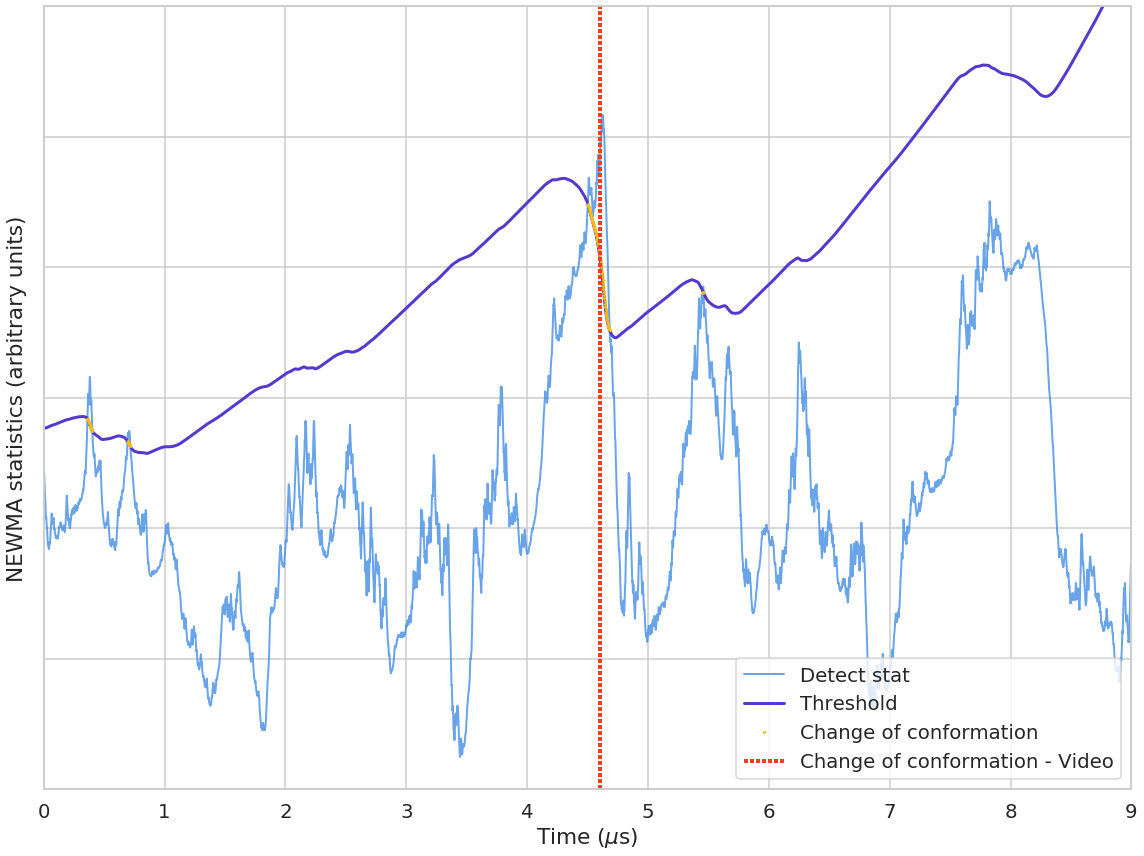

In [7]:
# compute performance metrics
argopuall = changeconf(detectopu, thopu)


fig, ax = plt.subplots(figsize=(16,12))

ax.plot(timerangeopu * 1e-6, detectopu,  label='Detect stat',color=sns.xkcd_rgb['dark sky blue'],
               alpha=0.8, linewidth=2)
ax.plot(timerangeopu * 1e-6, thopu, color=sns.xkcd_rgb['blurple'], label='Threshold', linewidth=3)
ax.plot(timerangeopu[argopuall] * 1e-6, thopu[argopuall], "o", color=sns.xkcd_rgb['golden rod'],markersize=2, \
                                                             label='Change of '
                                                           'conformation')

# These change points were obtained using the video of DE Shaw

ax.axvline(x=4.6, color=sns.xkcd_rgb['tomato'], linestyle='--', dashes=(1, .5), linewidth=4, label='Change of conformation - Video')

ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('NEWMA statistics (arbitrary units)')
ax.set_xlim(0, 9)
ax.set_ylim(10, 40)

ax.set_yticklabels([])
ax.legend(loc='lower right')
fig.tight_layout()
fig.savefig('corona_newmadetec_shaw_closed.png', format='png')

In [61]:
# Import the data generated with the script newma_coronavirus.py
newma = np.load('../newmaopu_totframe_10000_natoms_46851_closed_False_repeat2.npz')
time = newma['time']
detectopuo = newma['detection_stat']
thopuo = newma['online_th']

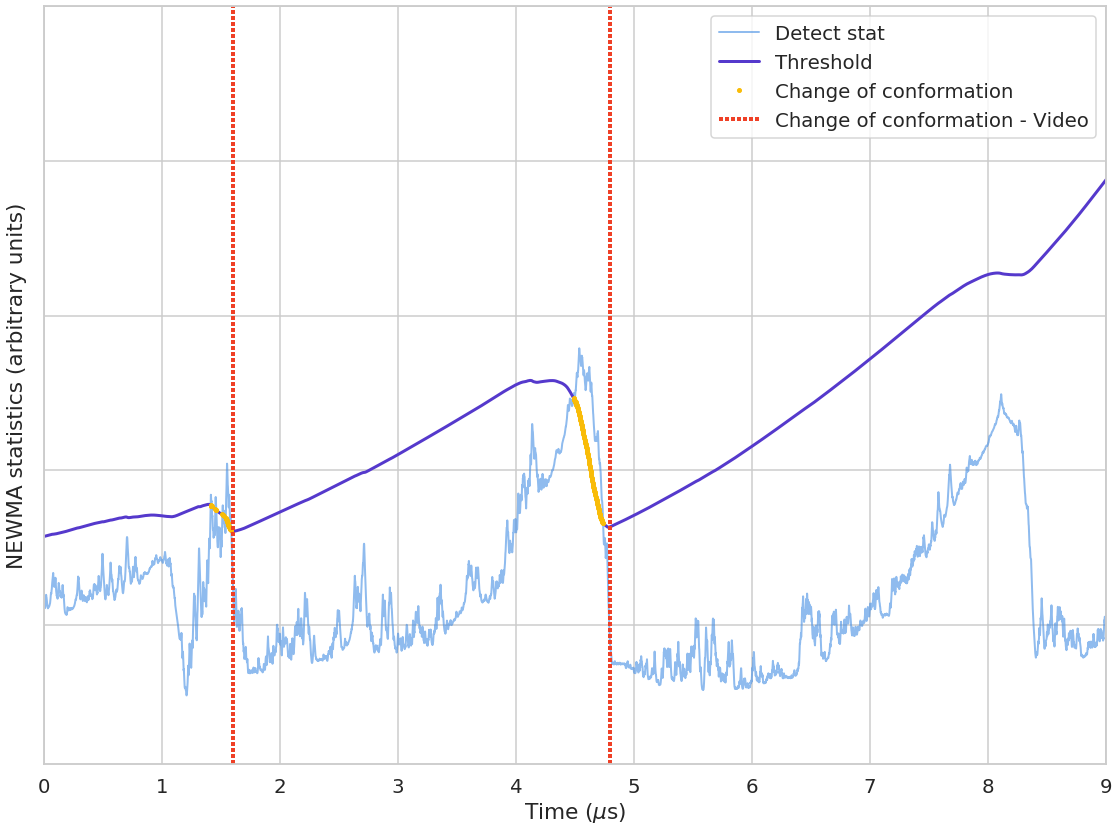

In [208]:
# compute performance metrics
argopuallo = changeconf(detectopuo, thopuo)


fig, ax = plt.subplots(figsize=(16,12))

ax.plot(time * 1e-6, detectopuo,  label='Detect stat',  color=sns.xkcd_rgb['dark sky blue'],
               alpha=0.6, linewidth=2)
ax.plot(time * 1e-6, thopuo, label='Threshold',  color=sns.xkcd_rgb['blurple'], linewidth=3)
ax.plot(time[argopuallo] * 1e-6, thopuo[argopuallo], "o",color=sns.xkcd_rgb['golden rod'], markersize=4, \
                                                             label='Change of '
                                                           'conformation')

# These change points were obtained using the video of DE Shaw
ax.axvline(x=1.6, color=sns.xkcd_rgb['tomato'], linestyle='--', dashes=(1, .5), linewidth=4, label='Change of conformation - Video')
ax.axvline(x=4.8, color=sns.xkcd_rgb['tomato'], linestyle='--', dashes=(1, .5), linewidth=4)

ax.set_yticklabels([])
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('NEWMA statistics (arbitrary units)')
ax.set_xlim(0, 9)
ax.set_ylim(1, 50)
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig('corona_newmadetec_shaw_opened.png', format='png')

In [46]:
# Import the data generated with the script newma_coronavirus.py
newma = np.load('../newmaopu_totframe_4000_natoms_715439_closed_False_repeat1.npz')
time = newma['time']
detectopuo = newma['detection_stat']
thopuo = newma['online_th']

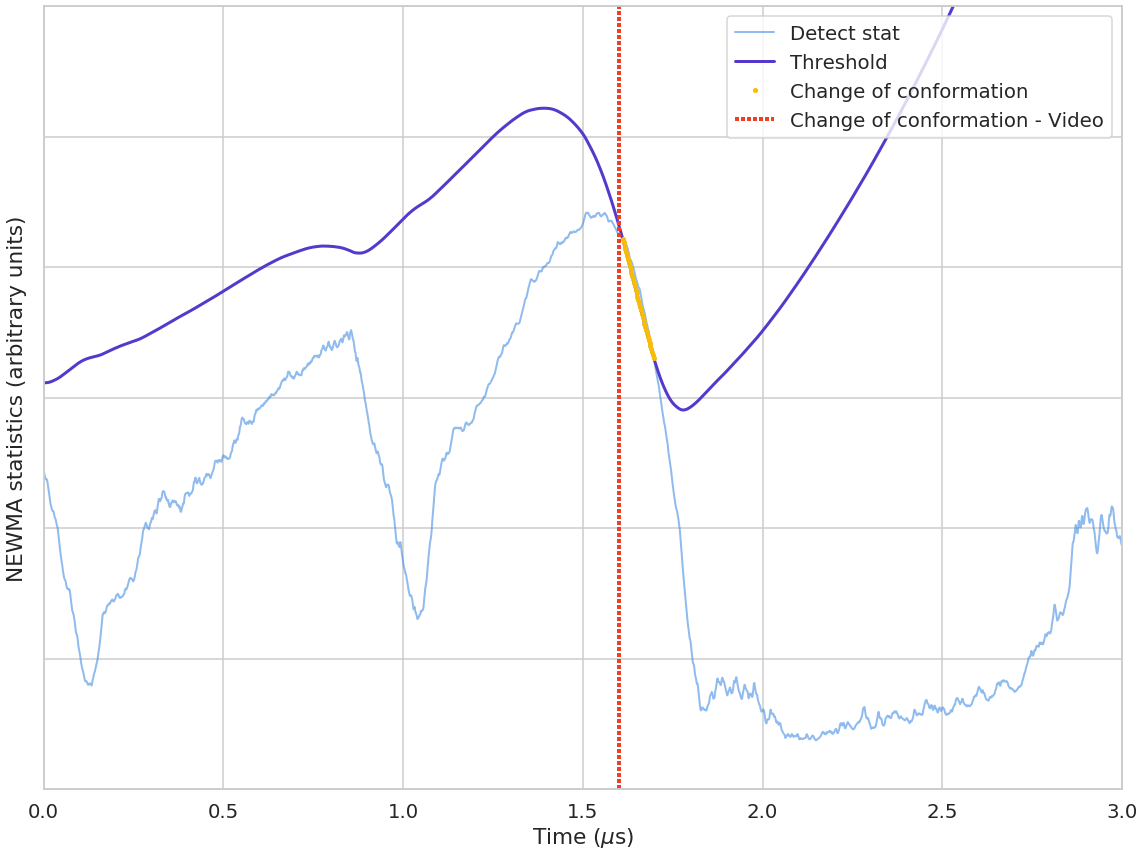

In [53]:
# compute performance metrics
argopuallo = changeconf(detectopuo, thopuo)

fig, ax = plt.subplots(figsize=(16,12))

ax.plot(time * 1e-6, detectopuo,  label='Detect stat',  color=sns.xkcd_rgb['dark sky blue'],
               alpha=0.6, linewidth=2)
ax.plot(time * 1e-6, thopuo, label='Threshold',  color=sns.xkcd_rgb['blurple'], linewidth=3)
ax.plot(time[argopuallo] * 1e-6, thopuo[argopuallo], "o",color=sns.xkcd_rgb['golden rod'], markersize=4, \
                                                             label='Change of '
                                                           'conformation')

# These change points were obtained using the video of DE Shaw
ax.axvline(x=1.6, color=sns.xkcd_rgb['tomato'], linestyle='--', dashes=(1, .5), linewidth=4, label='Change of conformation - Video')

ax.set_yticklabels([])
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('NEWMA statistics (arbitrary units)')
ax.set_xlim(0, 3)
ax.set_ylim(10, 40)
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig('corona_newmadetec_shaw_opened_FULL.png', format='png')